In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

netcdf_index loaded.
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path_obs = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

input_path_mod = '/g/data/e14/erd561/access-om2/'

In [4]:
sst_obs = xr.open_dataset(input_path_obs + 'sst.nc').sst
print(sst_obs)
sst_slopes_obs = xr.open_dataset(input_path_obs + 'sst_slopes.nc').sst_slopes
print(sst_slopes_obs)

sst_1_obs = xr.open_dataset(input_path_obs + 'sst_1.nc').sst_1
print(sst_1_obs)
sst_1_slopes_obs = xr.open_dataset(input_path_obs + 'sst_1_slopes.nc').sst_1_slopes
print(sst_1_slopes_obs)

sst_025_obs = xr.open_dataset(input_path_obs + 'sst_025.nc').sst_025
print(sst_025_obs)
sst_025_slopes_obs = xr.open_dataset(input_path_obs + 'sst_025_slopes.nc').sst_025_slopes
print(sst_025_slopes_obs)

sst_01_obs = xr.open_dataset(input_path_obs + 'sst_01.nc').sst_01
print(sst_01_obs)
sst_01_slopes_obs = xr.open_dataset(input_path_obs + 'sst_01_slopes.nc').sst_01_slopes
print(sst_01_slopes_obs)

<xarray.DataArray 'sst' (lat: 94, lon: 94, year: 25)>
[220900 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -71.5 -70.5 -69.5 -68.5 -67.5 ... 18.5 19.5 20.5 21.5
  * lon      (lon) float32 -271.5 -270.5 -269.5 -268.5 ... -180.5 -179.5 -178.5
  * year     (year) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'sst_slopes' (lat: 94, lon: 94)>
array([[      nan,       nan,       nan, ..., -0.002417, -0.003224, -0.003263],
       [      nan,       nan,       nan, ..., -0.004445, -0.005615, -0.005914],
       [      nan,       nan,       nan, ..., -0.005962, -0.007229, -0.007749],
       ...,
       [ 0.008761,  0.010363,  0.011421, ...,  0.022318,  0.020954,  0.02089 ],
       [ 0.004672,  0.006404,  0.00687 , ...,  0.020776,  0.019219,  0.0194  ],
       [-0.000127,  0.000919, -0.00071 , ...,  0.019156,  0.017395,  0.017758]])
Coordinates:
  * lat      (lat) float32 -71.5 -70.5 -69.5 -68.5 -67.5 ... 18.5 19.5 20.5 21.5
  * lon      (lon) 

In [5]:
sst_1_mod = xr.open_dataset(input_path_mod + 'net_sfc_heating_1.nc').net_sfc_heating_1
print(sst_1_mod)
sst_1_slopes_mod = xr.open_dataset(input_path_mod + 'net_sfc_heating_1_slopes.nc').net_sfc_heating_1_slopes
print(sst_1_slopes_mod)

sst_025_mod = xr.open_dataset(input_path_mod + 'net_sfc_heating_025.nc').net_sfc_heating_025
print(sst_025_mod)
sst_025_slopes_mod = xr.open_dataset(input_path_mod + 'net_sfc_heating_025_slopes.nc').net_sfc_heating_025_slopes
print(sst_025_slopes_mod)

sst_01_mod = xr.open_dataset(input_path_mod + 'net_sfc_heating_01.nc').net_sfc_heating_01
print(sst_01_mod)
sst_01_slopes_mod = xr.open_dataset(input_path_mod + 'net_sfc_heating_01_slopes.nc').net_sfc_heating_01_slopes
print(sst_01_slopes_mod)

<xarray.DataArray 'net_sfc_heating_1' (yt_ocean: 160, xt_ocean: 90, time: 25)>
[360000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... 17.85 18.59 19.36
  * xt_ocean  (xt_ocean) float64 -269.5 -268.5 -267.5 ... -182.5 -181.5 -180.5
  * time      (time) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'net_sfc_heating_1_slopes' (yt_ocean: 160, xt_ocean: 90)>
array([[      nan,       nan,       nan, ..., -0.022526, -0.038392, -0.064792],
       [      nan,       nan,       nan, ...,  0.055148,  0.034731, -0.008584],
       [      nan,       nan,       nan, ...,  0.077426,  0.060658,  0.028415],
       ...,
       [ 0.148164,  0.040856, -0.049635, ..., -0.227005, -0.197729, -0.171768],
       [ 0.108116,  0.02825 , -0.027087, ..., -0.296954, -0.259906, -0.219695],
       [ 0.016655, -0.04261 , -0.026752, ..., -0.367283, -0.323289, -0.290816]])
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 .

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


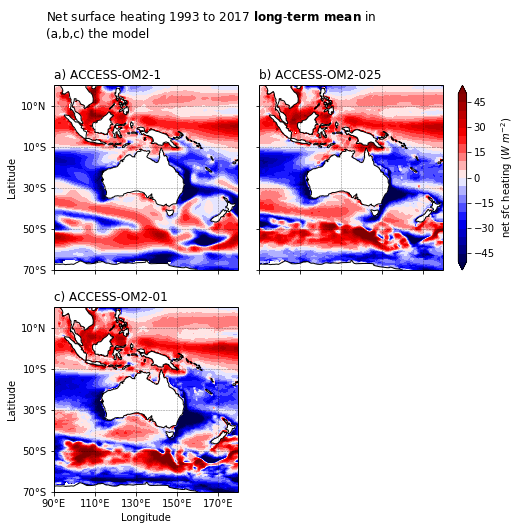

In [10]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Net surface heating 1993 to 2017 $\bf{long}$-$\bf{term\ mean}$ in ' +
    '\n(a,b,c) the model',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-50,50,5)
cmap = plt.cm.seismic
sst_1_bias = sst_1_mod.mean('time').values
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_mod.mean('time').values
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='net sfc heating ($W\ m^{-2}$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_mod.mean('year').values
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
# plt.contourf(sst_obs.lon+360, sst_obs.lat, 
#              sst_obs.mean('year').T, 
#              levels=levels, extend='both',
#              cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='Absolute SST ($^{\circ}C$)')
# ax.set_title('d) NOAA SST OI V2', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# # ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)

wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('long-term_average')

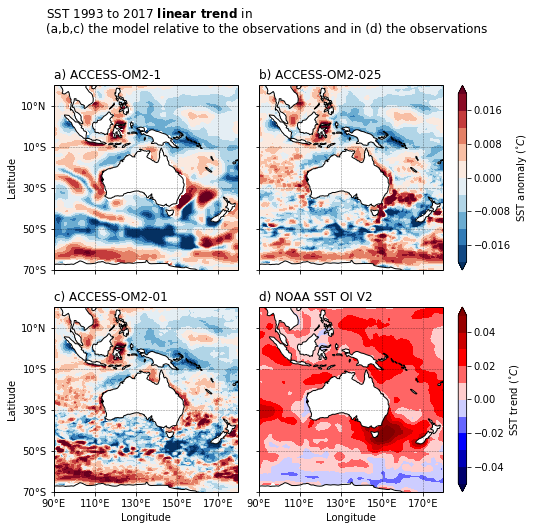

In [15]:
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
    '\n(a,b,c) the model relative to the observations and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.02,0.02,0.004)
cmap = plt.cm.RdBu_r
sst_1_bias = sst_1_slopes_mod.values-sst_1_slopes_obs.values
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values-sst_025_slopes_obs.values
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST anomaly ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values-sst_01_slopes_obs.values
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
levels=arange(-0.05,0.05,0.01)
cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

# savefigure('linear_trend_bias')

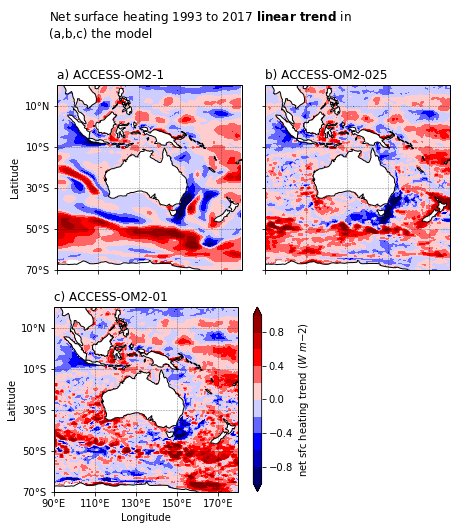

In [11]:
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Net surface heating 1993 to 2017 $\bf{linear\ trend}$ in ' +
    '\n(a,b,c) the model',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-1,1,0.2)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# # levels=arange(-0.05,0.05,0.01)
# # cmap = plt.cm.seismic
# plt.contourf(sst_obs.lon+360, sst_obs.lat, 
#              sst_slopes_obs, 
#              levels=levels, extend='both',
#              cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='net sfc heating trend ($W\ m{-2}$)')
# ax.set_title('d) NOAA SST OI V2', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# # ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)

wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trend')

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


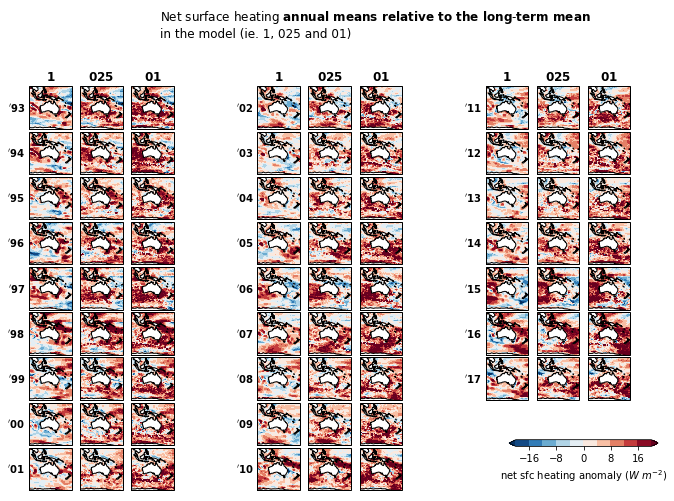

In [15]:
# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48))
# wspace = +0.1
# hspace = +0.1
# fig.subplots_adjust(
#         left=None, bottom=None, right=None, top=None, 
#         wspace=wspace, hspace=hspace)
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Net surface heating $\bf{annual\ means\ relative\ to\ the\ long}$-$\bf{term\ mean}$ ' +
    '\nin the model (ie. 1, 025 and 01)',
    x=0.2,y=1.025, ha='left')

row=9
col=12

year = np.arange(1993,2018)
c = 1

gs1 = gridspec.GridSpec(9, 4)
gs1.update(left=0, right=0.30, hspace=0)
for yi, y in enumerate(year[0:9]):
    ax = plt.subplot(gs1[yi,0], projection=ccrs.PlateCarree())
    levels=arange(-20,20,4)
    cmap = plt.cm.RdBu_r
    sst_1_bias = sst_1_mod.sel(time=y).values-sst_1_mod.mean('time').values
    plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
                 sst_1_bias, 
                 levels=levels, extend='both', 
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_yticks([90], crs=ccrs.PlateCarree())
    ax.set_ylabel(r"$\bf{'" + str(y)[-2:] + r"}$", rotation=0, ha='right', va='center')
    if yi == 0:
        ax.set_title(r'$\bf{1}$')
    ax.add_feature(land_50m)
    ax = plt.subplot(gs1[yi,1], projection=ccrs.PlateCarree())
    sst_025_bias = sst_025_mod.sel(time=y).values-sst_025_mod.mean('time').values
    plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
                 sst_025_bias, 
                 levels=levels, extend='both',
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    if yi == 0:
        ax.set_title(r'$\bf{025}$')
    ax.add_feature(land_50m)
    ax = plt.subplot(gs1[yi,2], projection=ccrs.PlateCarree())
    sst_01_bias = sst_01_mod.sel(year=y).values-sst_01_mod.mean('year').values
    plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
                 sst_01_bias, 
                 levels=levels, extend='both',
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    if yi == 0:
        ax.set_title(r'$\bf{01}$')
    ax.add_feature(land_50m)
#     ax = plt.subplot(gs1[yi,3], projection=ccrs.PlateCarree())
#     plt.contourf(sst_obs.lon+360, sst_obs.lat, 
#                  sst_obs.sel(year=y).values.T-sst_obs.mean('year').values.T, 
#                  levels=levels, extend='both',
#                  cmap=cmap, transform=ccrs.PlateCarree())
#     ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
#     if yi == 0:
#         ax.set_title(r'$\bf{OBS}$')
#     ax.add_feature(land_50m)
    print(y)

    
gs2 = gridspec.GridSpec(9, 4)
gs2.update(left=0.35, right=0.65, hspace=0)
for yi, y in enumerate(year[9:18]):
    ax = plt.subplot(gs2[yi,0], projection=ccrs.PlateCarree())
#     levels=arange(-1,1,0.2)
    cmap = plt.cm.RdBu_r
    sst_1_bias = sst_1_mod.sel(time=y).values-sst_1_mod.mean('time').values
    plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
                 sst_1_bias, 
                 levels=levels, extend='both', 
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_yticks([90], crs=ccrs.PlateCarree())
    ax.set_ylabel(r"$\bf{'" + str(y)[-2:] + r"}$", rotation=0, ha='right', va='center')
    if yi == 0:
        ax.set_title(r'$\bf{1}$')
    ax.add_feature(land_50m)
    ax = plt.subplot(gs2[yi,1], projection=ccrs.PlateCarree())
    sst_025_bias = sst_025_mod.sel(time=y).values-sst_025_mod.mean('time').values
    plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
                 sst_025_bias, 
                 levels=levels, extend='both',
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    if yi == 0:
        ax.set_title(r'$\bf{025}$')
    ax.add_feature(land_50m)
    ax = plt.subplot(gs2[yi,2], projection=ccrs.PlateCarree())
    sst_01_bias = sst_01_mod.sel(year=y).values-sst_01_mod.mean('year').values
    plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
                 sst_01_bias, 
                 levels=levels, extend='both',
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    if yi == 0:
        ax.set_title(r'$\bf{01}$')
    ax.add_feature(land_50m)
#     ax = plt.subplot(gs2[yi,3], projection=ccrs.PlateCarree())
#     plt.contourf(sst_obs.lon+360, sst_obs.lat, 
#                  sst_obs.sel(year=y).values.T-sst_obs.mean('year').values.T, 
#                  levels=levels, extend='both',
#                  cmap=cmap, transform=ccrs.PlateCarree())
#     ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
#     if yi == 0:
#         ax.set_title(r'$\bf{OBS}$')
#     ax.add_feature(land_50m)
    print(y)
    
    
    
gs3 = gridspec.GridSpec(9, 4)
gs3.update(left=0.70, right=1, hspace=0)
for yi, y in enumerate(year[18:25]):
    ax = plt.subplot(gs3[yi,0], projection=ccrs.PlateCarree())
#     levels=arange(-10,10,2)
    cmap = plt.cm.RdBu_r
    sst_1_bias = sst_1_mod.sel(time=y).values-sst_1_mod.mean('time').values
    plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
                 sst_1_bias, 
                 levels=levels, extend='both', 
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_yticks([90], crs=ccrs.PlateCarree())
    ax.set_ylabel(r"$\bf{'" + str(y)[-2:] + r"}$", rotation=0, ha='right', va='center')
    if yi == 0:
        ax.set_title(r'$\bf{1}$')
    ax.add_feature(land_50m)
    ax = plt.subplot(gs3[yi,1], projection=ccrs.PlateCarree())
    sst_025_bias = sst_025_mod.sel(time=y).values-sst_025_mod.mean('time').values
    plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
                 sst_025_bias, 
                 levels=levels, extend='both',
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    if yi == 0:
        ax.set_title(r'$\bf{025}$')
    ax.add_feature(land_50m)
    ax = plt.subplot(gs3[yi,2], projection=ccrs.PlateCarree())
    sst_01_bias = sst_01_mod.sel(year=y).values-sst_01_mod.mean('year').values
    plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
                 sst_01_bias, 
                 levels=levels, extend='both',
                 cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    if yi == 0:
        ax.set_title(r'$\bf{01}$')
    ax.add_feature(land_50m)
#     ax = plt.subplot(gs3[yi,3], projection=ccrs.PlateCarree())
#     plot = plt.contourf(sst_obs.lon+360, sst_obs.lat, 
#                  sst_obs.sel(year=y).values.T-sst_obs.mean('year').values.T, 
#                  levels=levels, extend='both',
#                  cmap=cmap, transform=ccrs.PlateCarree())
#     ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
#     if yi == 0:
#         ax.set_title(r'$\bf{OBS}$')
#     ax.add_feature(land_50m)
    print(y)

ax = plt.subplot(gs3[yi+1,0:4], projection=ccrs.PlateCarree())
ax.set_visible(False)
plt.colorbar(orientation='horizontal', label='net sfc heating anomaly ($W\ m^{-2}$)')

savefigure('annual_means')